In [28]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skmultilearn

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [3]:
path_to_file = "bloodclot_controversy_coding_VALIDATION_narrative.csv"

In [4]:
data_raw = pd.read_csv(path_to_file, encoding='utf-8')
data_raw.shape

(51454, 4)

In [5]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
printmd("**Sample data:**")
data_raw.head()

Number of rows in data = 51454
Number of columns in data = 4




**Sample data:**

,text,contextual_influences,vaccine_vaccination,personal_heuristic
0,"[UPDATE] @DrZweliMkhize: ""In South Africa, we ...",1,1,0
1,"[UPDATE] @DrZweliMkhize: ""In South Africa, we ...",1,1,0
2,4:27pm - SA publishes vaccination roadmap incl...,0,1,0
3,#BREAKING: Health Canada says a new and extrem...,1,1,0
4,Ever thought of blood clots before #smoking? T...,0,0,1


In [6]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

text                     1
contextual_influences    0
vaccine_vaccination      0
personal_heuristic       0
dtype: int64


In [7]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  51454
Number of clean comments =  3254
Number of comments with labels = 48200


In [8]:
categories = list(data_raw.columns.values)
categories = categories[1:]
print(categories)

['contextual_influences', 'vaccine_vaccination', 'personal_heuristic']


In [9]:
# Calculating number of comments in each category
counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,contextual_influences,40455
1,vaccine_vaccination,44872
2,personal_heuristic,12143


C:\Users\tomed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


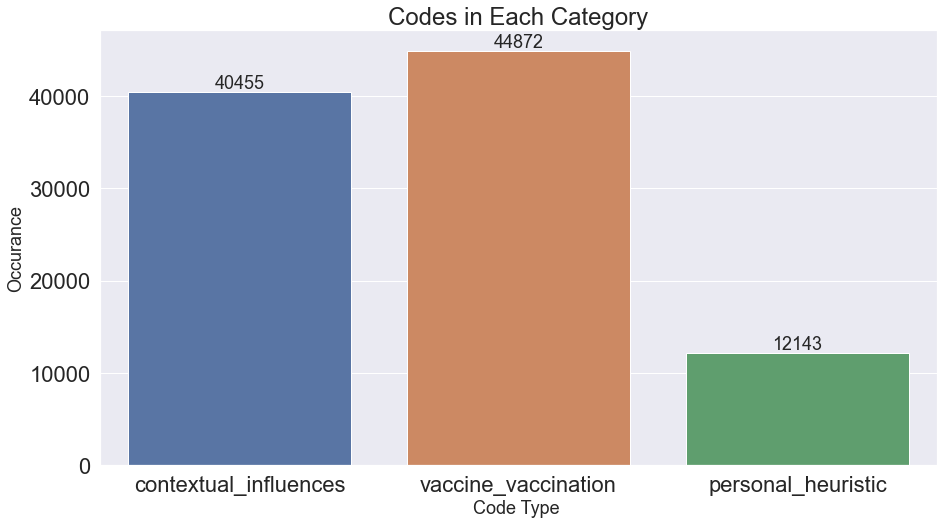

In [10]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data_raw.iloc[:,1:].sum().values)

plt.title("Codes in Each Category", fontsize=24)
plt.ylabel('Occurance', fontsize=18)
plt.xlabel('Code Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,1:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

In [11]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

(2000, 4)

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [13]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [14]:
data['text'] = data['text'].str.lower()
data['text'] = data['text'].apply(cleanHtml)
data['text'] = data['text'].apply(cleanPunc)
data['text'] = data['text'].apply(keepAlpha)
data.head()

,text,contextual_influences,vaccine_vaccination,personal_heuristic
36874,breaking cdc fda called for a temporary but...,1,1,0
28044,breaking the national medical regulator has co...,1,1,0
42206,just in fda and cdcgov issued a statement t...,1,1,0
36345,now that we have confirmation the az vaccine i...,1,1,1
29869,update one us patient died from blood clotting...,1,1,0


In [16]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['text'] = data['text'].apply(stemming)
data.head()

,text,contextual_influences,vaccine_vaccination,personal_heuristic
36874,break cdc fda call for a temporari but immedi ...,1,1,0
28044,break the nation medic regul has conclud a rec...,1,1,0
42206,just in fda and cdcgov issu a statement to hal...,1,1,0
36345,now that we have confirm the az vaccin is caus...,1,1,1
29869,updat one us patient die from blood clot compl...,1,1,0


In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1400, 4)
(600, 4)


In [18]:
train_text = train['text']
test_text = test['text']

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [21]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['text'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['text'], axis=1)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [24]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} narratives...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing contextual_influences narratives...**

Test accuracy is 0.84




**Processing vaccine_vaccination narratives...**

Test accuracy is 0.9233333333333333




**Processing personal_heuristic narratives...**

Test accuracy is 0.8933333333333333


Wall time: 1.91 s


In [29]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8383333333333334


Wall time: 1.72 s


In [30]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [31]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.7483333333333333


Wall time: 3.17 s


In [32]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [33]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.775


Wall time: 2.67 s


In [34]:
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [35]:
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")

Accuracy =  0.755


Wall time: 1.25 s
